# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matches = pd.read_csv("E:\\Datasets\\DataSet\\Football 1872-2019.csv")

In [4]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
matches.shape

(40945, 9)

In [6]:
matches.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [43]:
matches.describe()

,home_score,away_score
count,40945.000000,40945.000000
mean,1.745463,1.188521
std,1.748619,1.405116
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [44]:
matches = matches.astype({'date':'datetime64[ns]'})

# Visualization

Text(0.5, 1.0, 'TOP 5 Types of MATCH TOURNAMENTS')

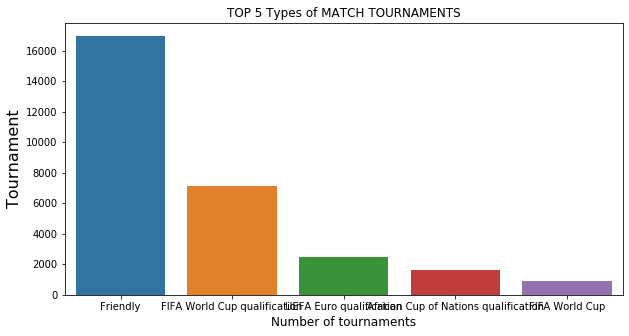

In [106]:
tournament = matches['tournament'].value_counts()
tournament = tournament[:5]
plt.figure(figsize = (10,5))
barplot = sns.barplot(tournament.index, tournament.values)
barplot.set_ylabel('Tournament', size=16)
barplot.set_xlabel('Number of tournaments', size=12)
barplot.set_title("TOP 5 Types of MATCH TOURNAMENTS")

Text(0.5, 1.0, 'TOP 5 Match hosting cities')

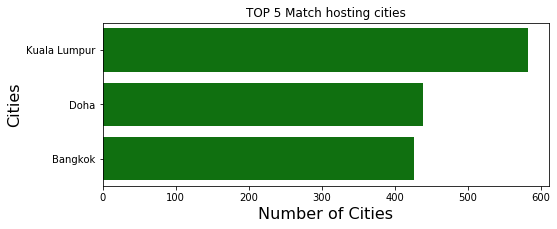

In [18]:
tournament1 = matches['city'].value_counts()
tournament1 = tournament1[:3]

plt.figure(figsize = (8,3))
barplot = sns.barplot(y=tournament1.index, x=tournament1.values,color='green')
barplot.set_ylabel('Cities', size=16)
barplot.set_xlabel('Number of Cities', size=16)
barplot.set_title("TOP 5 ""Match hosting cities""")

tournament1 = matches['country'].value_counts()
tournament1 = tournament1[:5]

plt.figure(figsize = (10,5))
barplot = sns.swarmplot(y=tournament1.index, x=tournament1.values)
barplot.set_ylabel('Countries', size=16)
barplot.set_xlabel('Number of Countries', size=16)
barplot.set_title("TOP 5 ""Match hosting Countries""")

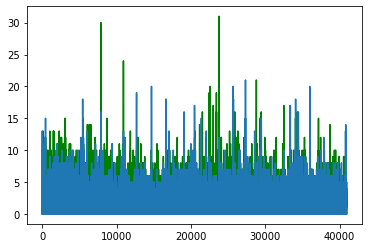

In [19]:
plt.plot(matches['home_score'],color='green')
plt.plot(matches['away_score'])

In [24]:
print("Total number of tournaments:{0}".format(len(matches['tournament'].unique())))
print("Total number of countries participated: {0}".format(len(matches['country'].unique())))
print("Total number of cities hosted for matches: {0}".format(len(matches['city'].unique())))

Total number of tournaments:109
Total number of countries participated: 266
Total number of cities hosted for matches: 1965


In [53]:
wins=matches.home_score>matches.away_score
lost=matches.home_score<matches.away_score
drawn=matches.home_score==matches.away_score

In [54]:
print("Total match wins = {0}".format(len(matches[wins])))
print("Total match lost = {0}".format(len(matches[lost])))
print("Total match drawn = {0}".format(len(matches[drawn])))

Total match wins = 19912
Total match lost = 11577
Total match drawn = 9456


# Best Team of all time

In [118]:
matches['total_score'] = matches['home_score']+matches['away_score']

In [192]:
matches.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,total_score
23,1882-03-25,Scotland,Wales,5,0,Friendly,Glasgow,Scotland,False,1882,5
25,1883-02-24,England,Northern Ireland,7,0,Friendly,Liverpool,England,False,1883,7
26,1883-03-10,England,Scotland,2,3,Friendly,Sheffield,England,False,1883,5


In [182]:
matches1=matches.groupby('home_team')['total_score'].sum().sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'TOP 5 best Teams')

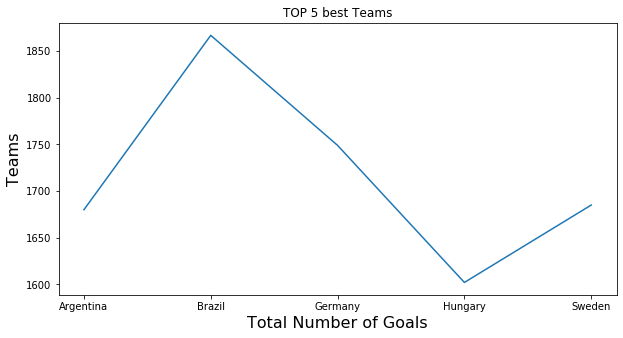

In [222]:
plt.figure(figsize = (10,5))
barplot = sns.lineplot(matches1.index, matches1.values)
barplot.set_ylabel('Teams', size=16)
barplot.set_xlabel('Total Number of Goals', size=16)
barplot.set_title("TOP 5 best Teams")

# Match Results 

In [9]:
def result(x):
      
    if x['home_score'] > x['away_score']:
        return x['home_team']
    elif x['home_score'] < x['away_score']:
        return x['away_team']
    else:
        return('Tie')

In [10]:
matches['results'] = pd.DataFrame(matches[['home_score','away_score','home_team','away_team']].apply(result,axis=1))
matches[['home_score','away_score','home_team','away_team','results']].head()

,home_score,away_score,home_team,away_team,results
0,0,0,Scotland,England,Tie
1,4,2,England,Scotland,England
2,2,1,Scotland,England,Scotland
3,2,2,England,Scotland,Tie
4,3,0,Scotland,England,Scotland


In [11]:
more_wins_team=matches['results'].value_counts().sort_values(ascending=False).head(5)
print(more_wins_team)

Tie          9456
Brazil        625
England       565
Germany       552
Argentina     525
Name: results, dtype: int64


# Place of wins "Home" or "Away"

In [12]:
def wins(y):
        
        if y['home_team'] == y['results']:
            return("Home_team")
        elif y['results'] == "Tie":
            return("Tie")
        else:
            return("Away_team")

In [14]:
matches['Team_win'] = pd.DataFrame(matches[['home_team','results']].apply(wins,axis=1))
matches[['home_team','results','Team_win']].head()

,home_team,results,Team_win
0,Scotland,Tie,Tie
1,England,England,Home_team
2,Scotland,Scotland,Home_team
3,England,Tie,Tie
4,Scotland,Scotland,Home_team


In [25]:
matches['place_win'].value_counts()

Home_team    19912
Away_team    11577
Tie           9456
Name: place_win, dtype: int64

In [88]:
matches['year'] = matches['date'].dt.year
matches['month'] = matches['date'].dt.month
matches['day'] = matches['date'].dt.day

In [102]:
matches['month'].value_counts().sort_values
matches['day'].value_counts().sort_values

<bound method Series.sort_values of 11    1798
6     1664
8     1591
10    1547
7     1534
15    1518
12    1515
14    1507
9     1455
5     1402
16    1401
28    1392
17    1379
26    1353
29    1299
3     1293
2     1293
13    1277
4     1242
27    1229
25    1220
22    1215
18    1173
24    1167
1     1162
19    1160
20    1149
30    1133
23    1081
21    1064
31     732
Name: day, dtype: int64>

In [105]:
matches.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,place_win,Team_win,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie,Tie,Tie,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Home_team,Home_team,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,Home_team,Home_team,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie,Tie,Tie,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,Home_team,Home_team,1876,3,4


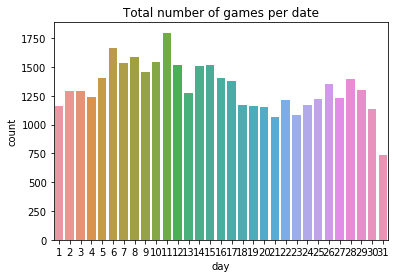

In [109]:
plt.title("Total number of games per date")
sns.countplot(data=matches,x=matches['day'])
plt.show()

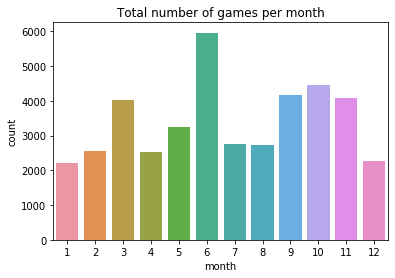

In [110]:
plt.title("Total number of games per month")
sns.countplot(data=matches,x=matches['month'])
plt.show()